In [6]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [57]:
import cv2

In [58]:
name="My name is NoshiniKR"

In [59]:
print("The Original String is:- "+name)

The Original String is:- My name is NoshiniKR


In [60]:
res=''.join(format(ord(i),'b')for i in name)

In [61]:
print(res)

10011011111001100000110111011000011101101110010110000011010011110011100000100111011011111110011110100011010011101110110100110010111010010


In [62]:
def BinaryTointeger(binary):  
         
    binary1 = binary  
    decimal, i, n = 0, 0, 0
    while(binary != 0):  
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)  
        binary = binary//10
        i += 1
    return (decimal)     

bin_data =res
   
print("The binary value is:", bin_data) 
   

str_data =' '
   

for i in range(0, len(bin_data), 7): 
    temp_data = int(bin_data[i:i + 7]) 
    decimal_data = BinaryTointeger(temp_data) 
    str_data = str_data + chr(decimal_data)  
   

print("The Binary value after string conversion is:",str_data) 

The binary value is: 10011011111001100000110111011000011101101110010110000011010011110011100000100111011011111110011110100011010011101110110100110010111010010
The Binary value after string conversion is:  MyA]C[K'NvFNvL]


In [63]:
def message2binary(message):
  if type(message) == str:
    result= ''.join([ format(ord(i), "08b") for i in message ])
    
  elif type(message) == bytes or type(message) == np.ndarray:
    result= [ format(i, "08b") for i in message ]
    
  elif type(message) == int or type(message) == np.uint8:
    result=format(message, "08b")

  else:
    raise TypeError("Input type is not supported")
    
  return result 

In [64]:
# message2binary("sheloouserthisisNoshiniKR")

In [65]:
# message2binary("mynameisNoshiniKR")

In [66]:
# r,g,b=message2binary([50,35,155])

In [88]:
from IPython.display import Image
import os

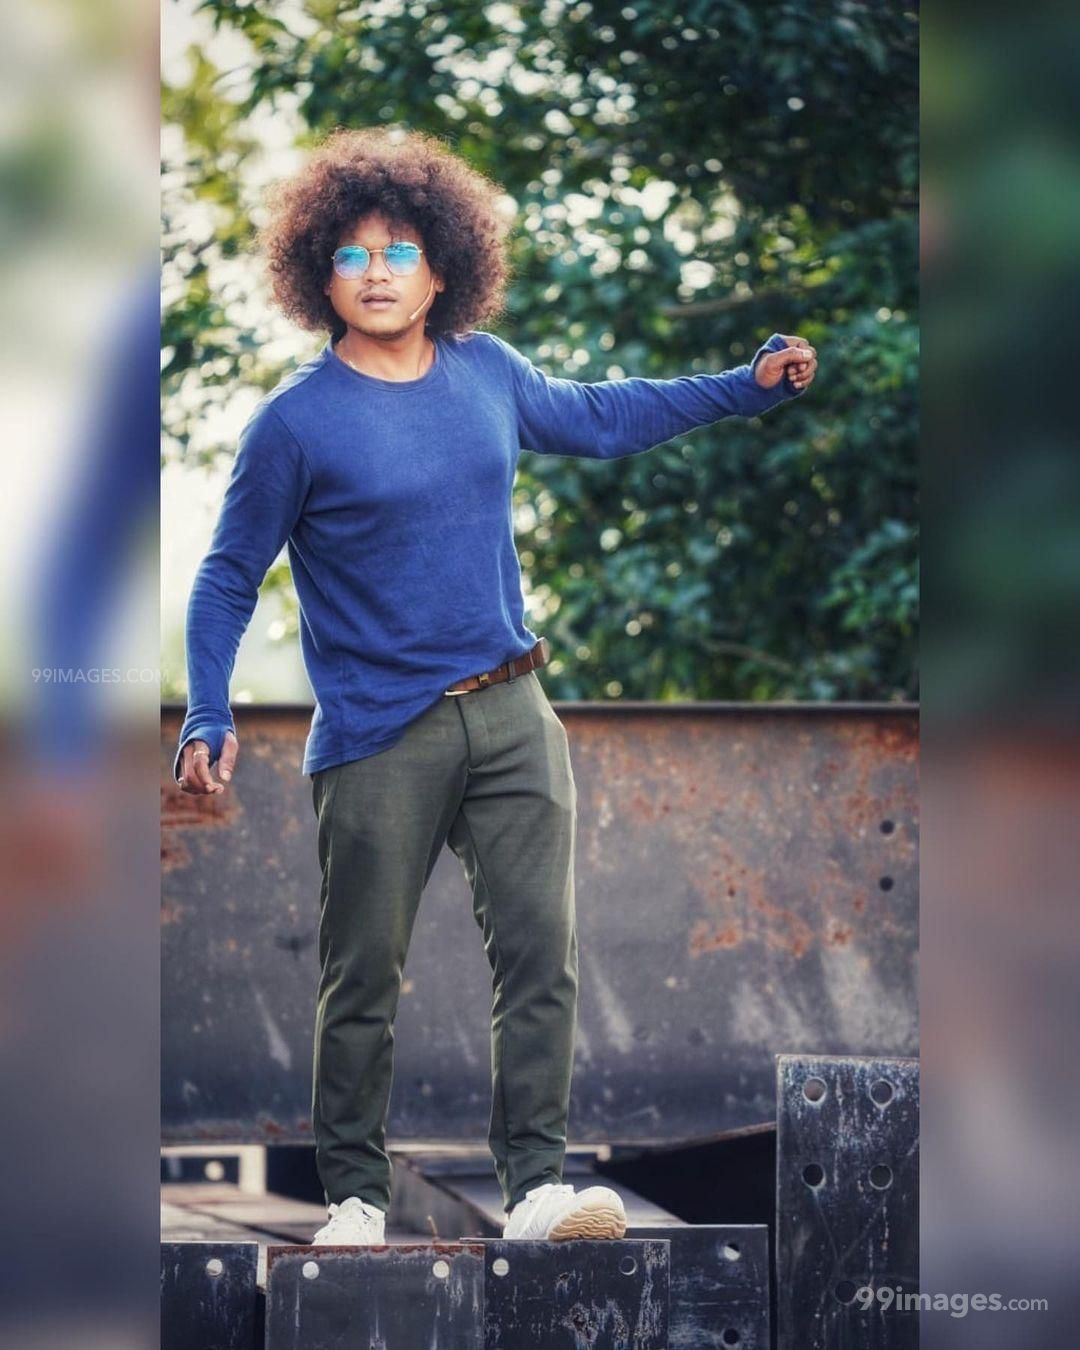Image('/content/download.jpg')

In [91]:
image=cv2.imread("/content/download.jpg")

In [92]:
#image

In [93]:
# for i in image:
#     for pixel in i:
#         print(pixel)

In [94]:
h='1000110'
int(h[:-1]+'1',2)

71

In [95]:
list1=[ ]

In [96]:
def encode_data(img):
    data=input("Enter the data to be Encoded:")    
    if (len(data) == 0): 
      raise ValueError('Data is empty')
  
    filename = input("Enter the name of the New Image after Encoding(with extension):")
    
    no_bytes=(img.shape[0] * img.shape[1] * 3) // 8
    
    print("Maximum bytes to encode:", no_bytes)
    
    if(len(data)>no_bytes):
        raise ValueError("Error encountered Insufficient bytes, Need Bigger Image or give Less Data !!")
    
    # Using the below as delimeter
    data +='*****'    
    
    data_binary=message2binary(data)
    print(data_binary)
    data_len=len(data_binary)
    
    print("The Length of Binary data",data_len)
    
    data_index = 0
    
    for i in img:
        for pixel in i:
            
          r, g, b = message2binary(pixel)
         # print(r)
         # print(g)
         # print(b)
        #   print(pixel)
          if data_index < data_len:
              # hiding the data into LSB(Least Significant Bit) of Red Pixel
#               print("Original Binary",r)
              # print("The old pixel",pixel[0])
              pixel[0] = int(r[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Red Pixel
#               print("Changed binary",r[:-1] + data_binary[data_index])
              
              data_index += 1
              list1.append(pixel[0])

          if data_index < data_len:
             # hiding the data into LSB of Green Pixel
              pixel[1] = int(g[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Green Pixel
              data_index += 1
              list1.append(pixel[1])

          if data_index < data_len:
              # hiding the data into LSB of  Blue Pixel
              pixel[2] = int(b[:-1] + data_binary[data_index], 2) #changing to binary after overwrriting the LSB bit of Blue pixel
              data_index += 1
              list1.append(pixel[2])

              # if data is encoded, just breaking out of the Loop
          if data_index >= data_len:
              break

         
  
    cv2.imwrite(filename,img)
    
    print("Encoded the data successfully and the image is successfully saved as ",filename)

In [99]:
encode_data(image)

Enter the data to be Encoded:My name is NoshiniKR
Enter the name of the New Image after Encoding(with extension):Image_new.jpg


AttributeError: 'NoneType' object has no attribute 'shape'

In [20]:
def decode_data(img):

  binary_data = ""
  for i in img:
      for pixel in i:
        
        #   print(pixel)
          r, g, b = message2binary(pixel) 
          binary_data += r[-1]  #Extracting Encoded data from the LSB bit of Red Pixel as we have stored in LSB bit of every pixel.
          binary_data += g[-1]  #Extracting Encoded data from the LSB bit of Green Pixel
          binary_data += b[-1]  #Extracting Encoded data from LSB bit of Blue Pixel

  # splitting by 8-bits
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]

  # Converting the bits to Characters
  decoded_data = ""
  for byte in all_bytes:
      decoded_data += chr(int(byte, 2))
      if decoded_data[-5:] == "*****": #Checking if we have reached the delimeter which is "*****"
          break

  
  print("The Encoded data was :--",decoded_data[:-5])

In [21]:
image1=cv2.imread("/content/stegano_final.png")

In [22]:
decode_data(image1)

TypeError: 'NoneType' object is not iterable

In [23]:
Image('/content/download.jpg')

NameError: name 'Image' is not defined

In [24]:
Image('/content/stegano_final.png')

NameError: name 'Image' is not defined